In [1]:
# Imports

# stdlib
import json
from os.path import expanduser

# Import pandas
import pandas as pd

# Import matplotlib and Basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Set iPython to display visualization inline
%matplotlib inline

from elos.db import DB
from elos.models import *

#### Load elos config, and get a database handle

In [2]:
from elos.config import Config

config = Config.load()
db = config.db()

#### Load events, as an example

In [3]:
events = [data.unmarshal(Event) for data in db.query(EventKind).select({"owner_id": config.user_id}).execute()]
df = pd.DataFrame([e.marshal() for e in events])
print("\n%d events" % len(events))
df


ConnectionError: ('Connection aborted.', BadStatusLine("''",))

#### Load locations, we are going to plot them

In [4]:
locations = [data.unmarshal(Location) for data in db.query(LocationKind).select({"owner_id": config.user_id}).execute()]
df = pd.DataFrame([l.marshal() for l in locations])
print("\n%d locations" % len(locations))
df


6135 locations


,altitude,created_at,deleted_at,id,latitude,longitude,owner_id,updated_at
0,79.286766,2016-02-11T08:21:31.771000+00:00,2001-01-01T00:00:00+00:00,56bc448bd6e4fe5a08000001,37.866744,-122.257461,5698366ed6e4fe081b06570a,2016-02-11T08:21:31.771000+00:00
1,77.776146,2016-02-11T17:17:38.853000+00:00,2001-01-01T00:00:00+00:00,56bcc232d6e4fe5a08000003,37.866702,-122.257318,5698366ed6e4fe081b06570a,2016-02-11T17:17:38.853000+00:00
2,77.776146,2016-02-11T17:17:39.037000+00:00,2001-01-01T00:00:00+00:00,56bcc233d6e4fe5a08000005,37.866702,-122.257318,5698366ed6e4fe081b06570a,2016-02-11T17:17:39.037000+00:00
3,89.691185,2016-02-12T00:39:05.132000+00:00,2001-01-01T00:00:00+00:00,56bd29a9d6e4fe5a08000007,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:05.132000+00:00
4,89.660179,2016-02-12T00:39:05.559000+00:00,2001-01-01T00:00:00+00:00,56bd29a9d6e4fe5a08000009,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:05.559000+00:00
5,89.425621,2016-02-12T00:39:06.569000+00:00,2001-01-01T00:00:00+00:00,56bd29aad6e4fe5a0800000b,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:06.569000+00:00
6,89.426598,2016-02-12T00:39:07.559000+00:00,2001-01-01T00:00:00+00:00,56bd29abd6e4fe5a0800000d,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:07.559000+00:00
7,89.428673,2016-02-12T00:39:08.564000+00:00,2001-01-01T00:00:00+00:00,56bd29acd6e4fe5a0800000f,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:08.564000+00:00
8,89.430138,2016-02-12T00:39:09.713000+00:00,2001-01-01T00:00:00+00:00,56bd29add6e4fe5a08000011,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:09.713000+00:00
9,89.433311,2016-02-12T00:39:10.707000+00:00,2001-01-01T00:00:00+00:00,56bd29aed6e4fe5a08000013,37.871160,-122.259076,5698366ed6e4fe081b06570a,2016-02-12T00:39:10.707000+00:00


#### Plot the points using Basemap, will probably just look like one point on where you spend most of your time

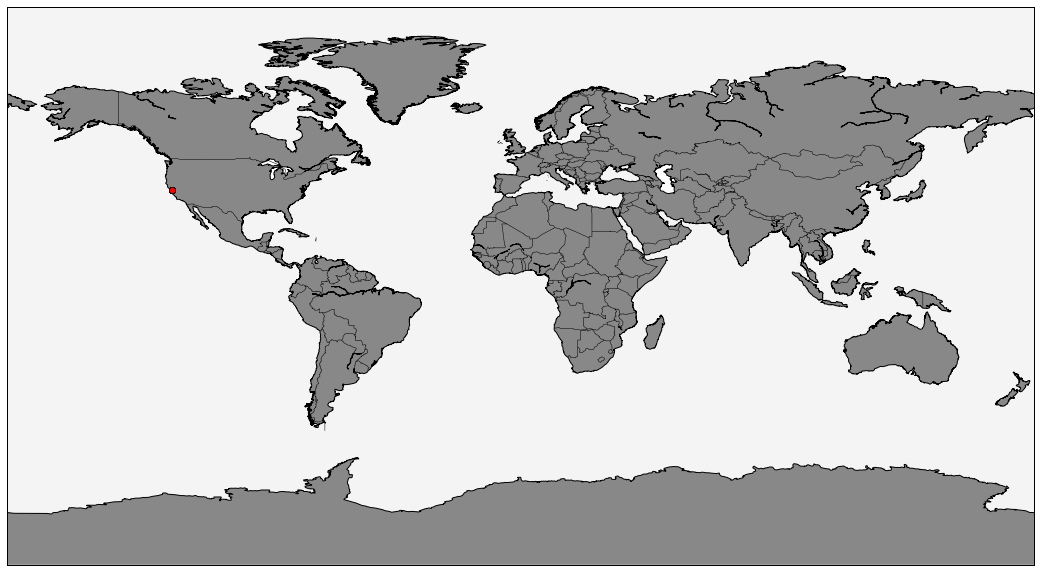

Plotted 6135 points


In [5]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall',
              # with low resolution,
              resolution = 'l',
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(df['longitude'].values, df['latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()
print("Plotted %d points" % (len(locations),))

In [6]:
pd.DataFrame([l.marshal for l in locations if l.altitude > 100])

,0
0,<bound method Location.marshal of <elos.models...
1,<bound method Location.marshal of <elos.models...
2,<bound method Location.marshal of <elos.models...
3,<bound method Location.marshal of <elos.models...
4,<bound method Location.marshal of <elos.models...
5,<bound method Location.marshal of <elos.models...
6,<bound method Location.marshal of <elos.models...
7,<bound method Location.marshal of <elos.models...
8,<bound method Location.marshal of <elos.models...
9,<bound method Location.marshal of <elos.models...
